# Time Series Analysis using Facebook Prophet - Solution

![Namespace Labs](../../../../labs.png)

### Installation

pip install fbprophet

## Predict total sales

In [1]:
from fbprophet import Prophet

import pandas as pd

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
# Print the head of the dataset
df.head()

,ds,y
0,1/10/2011,36529.3764
1,1/11/2011,102403.8663
2,1/12/2011,36177.7578
3,1/13/2011,31005.6454
4,1/14/2011,71539.6626


In [4]:
# Print the tail of the dataframe
df.tail()

,ds,y
300,9/5/2011,55634.5004
301,9/6/2011,42359.4562
302,9/7/2011,51529.7315
303,9/8/2011,40329.0800
304,9/9/2011,44269.7119


In [35]:
# Create an instance of prophet
# Fit the data to the model
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
# Create a dataframe for future dates
# Print the head of the dataframe
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
665,2012-12-04
666,2012-12-05
667,2012-12-06
668,2012-12-07
669,2012-12-08


In [37]:
# Make predictions on the model
forecast = model.predict(future)

In [38]:
# Display one row from the predictions
forecast.sample()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
36,2011-01-23,42867.928107,-6714.190982,40193.697009,42867.928107,42867.928107,-27030.614733,-27030.614733,-27030.614733,-27030.614733,-27030.614733,-27030.614733,0.0,0.0,0.0,15837.313374


In [39]:
# Display the tail of the forecasts
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
665,2012-12-04,203598.022434,167979.790361,243119.149601
666,2012-12-05,196185.942958,157316.881524,235763.330602
667,2012-12-06,207165.597844,172126.067913,245796.791071
668,2012-12-07,193184.124509,154330.571944,230129.653942
669,2012-12-08,219567.047483,180102.116073,259068.363376


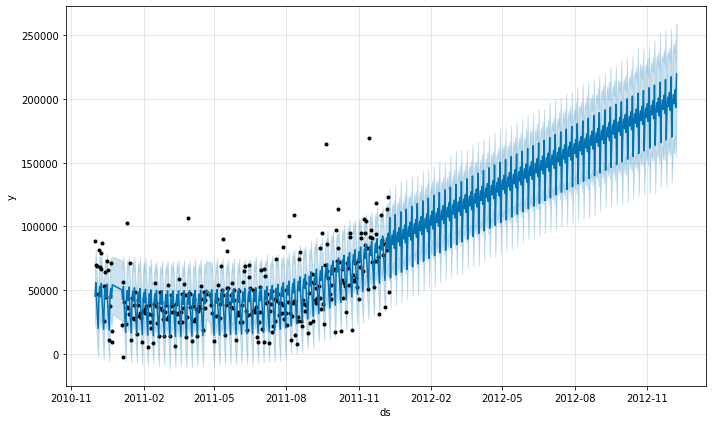

In [40]:
# Plot the forecast
plot = model.plot(forecast)


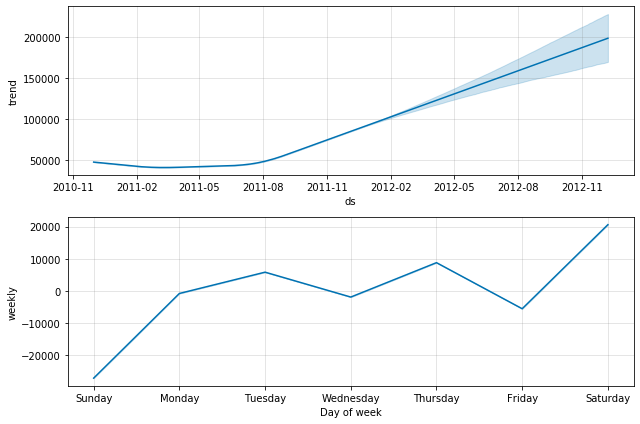

In [41]:
# Plot the model components
plot2 = model.plot_components(forecast)

In [43]:
# Perform cross validation
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon = '50 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2011-05-23 00:00:00 and 2011-10-20 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-05-24,53051.395034,34562.398683,72967.608327,55913.6541,2011-05-23
1,2011-05-25,39224.377076,20018.531540,58302.338419,36469.9428,2011-05-23
2,2011-05-26,47875.302193,29312.539343,67049.498838,50144.9709,2011-05-23
3,2011-05-27,45565.375149,27495.976809,65477.803691,42630.6069,2011-05-23
4,2011-05-29,19623.190281,1014.067005,38865.561998,10884.5330,2011-05-23


In [44]:
# Display the performance metrics
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,5 days,2.920717e+08,17090.104567,12206.673845,0.309652,0.274996,0.839080
1,6 days,2.562110e+08,16006.590958,11481.489832,0.327742,0.274996,0.867816
2,7 days,2.916000e+08,17076.298320,12491.171362,0.414800,0.274996,0.827586
3,8 days,3.565214e+08,18881.775467,13317.512174,0.438858,0.280845,0.758621
4,9 days,3.632981e+08,19060.380849,14052.113341,0.492342,0.293798,0.793103


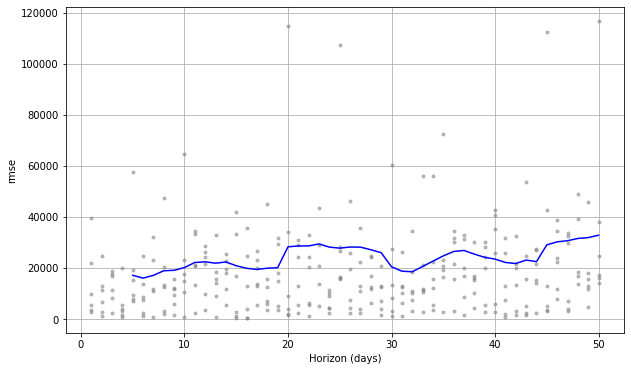

In [45]:
# Plot the performance metrics
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

Happy Coding!